In [1]:
!ls

Homework1.ipynb       income.test.blind     random_output.py
hw1-report.docx       income.test.predicted toy.txt
income.dev.txt        income.train.txt.5k   validate.py


In [2]:
import pandas as pd
import numpy as np

# Part 1

### 1.1

In [3]:
greater50k = !cat income.train.txt.5k | grep '>50K' -c

In [4]:
greater50k

['1251']

In [5]:
total = !tail -n +2 income.train.txt.5k | wc -l

In [6]:
total

['    4999']

In [7]:
greater50k_int = int(greater50k[0])
total_int = int(total[0])

percentage = (greater50k_int/total_int)*100
# percentage

print(f'Percentage for train set: {percentage}')

Percentage for train set: 25.0250050010002


In [8]:
greater50k = !cat income.dev.txt | grep '>50K' -c
greater50k

['236']

In [9]:
total = !tail -n +2 income.dev.txt | wc -l
total

['     999']

In [10]:
greater50k_int = int(greater50k[0])
total_int = int(total[0])

percentage = (greater50k_int/total_int)*100
# percentage

print(f'Percentage for train set: {percentage}')

Percentage for train set: 23.623623623623622


In [11]:
"From both percentages, it does not make sense that less than 26% of workers in the US earns >50k."

'From both percentages, it does not make sense that less than 26% of workers in the US earns >50k.'

### 1.2

In [12]:
youngest_age = !cat income.train.txt.5k | cut -f 1 -d ','| sort -nk1| head -1
maximum_age = !cat income.train.txt.5k | cut -f 1 -d ',' | sort | tail -1

In [13]:
print(f'Youngest age: {youngest_age}')
print(f'Oldest age: {maximum_age}')

Youngest age: ['17']
Oldest age: ['90']


In [14]:
least_hours = !cat income.train.txt.5k | cut -f 8 -d ','| sort -nk1| head -1
most_hours = !cat income.train.txt.5k | cut -f 8 -d ',' | sort | tail -1

In [15]:
print(f'Least hours: {least_hours}hour(s) per week')
print(f'Most hours: {most_hours}hour(s) per week')

Least hours: [' 1']hour(s) per week
Most hours: [' 99']hour(s) per week


## 1.3

In [16]:
"Binarizing categorical fields converts non-numerical data into a format suitable for machine learning algorithms, ensuring accurate interpretations without introducing algorithmic bias from ordinal encodings."

'Binarizing categorical fields converts non-numerical data into a format suitable for machine learning algorithms, ensuring accurate interpretations without introducing algorithmic bias from ordinal encodings.'

In [17]:
"We do not want to binarize the two numerical fields, age and hours, because they contain ordinal data with meaningful magnitudes and relationships, and binarizing them would result in a loss of this valuable information and introduce unnecessary dimensionality."

'We do not want to binarize the two numerical fields, age and hours, because they contain ordinal data with meaningful magnitudes and relationships, and binarizing them would result in a loss of this valuable information and introduce unnecessary dimensionality.'

## 1.4

#### How should we deal with the two numerical fields? Just as is, or normalize them (say, age / 100)

In [18]:
'We should scale the numerical fields so that their maximum Manhattan distance matches that of the categorical fields. For instance, multiplying the normalized age by 2 (after dividing by 100) would make its range between 0 and 2, aligning its maximum Manhattan distance with the categorical fields.'

'We should scale the numerical fields so that their maximum Manhattan distance matches that of the categorical fields. For instance, multiplying the normalized age by 2 (after dividing by 100) would make its range between 0 and 2, aligning its maximum Manhattan distance with the categorical fields.'

#### If we simply normalize a numerical field (age/100), what’s the max distance on age?

The range for age is between 0 and 100 (generally speaking). If we normalize it by dividing by 100:
- Minimum age (0 years) becomes 0.
- Maximum age (100 years) becomes 1.

Given the Manhattan distance formula, the maximum distance between these two extremes is:
Distance = |1 - 0| = 1

#### Are we treating all fields equally

No.
By using this normalization approach, we are not treating all fields equally. The discrepancy in maximum possible distance means that categorical fields can potentially have a more significant influence on algorithms or analyses that rely on distance measurements compared to the normalized numerical fields.

### 1.5

In [19]:
!head -n 1 income.train.txt.5k | awk '{print NF - 1}'

9


# Part 2

#### Question: Although pandas.get_dummies() is very handy for one-hot encoding, it’s absolutely impossible
#### to be used in machine learning. Why? (0.5 pts) (Hint: It’s important to think about the entire pipeline. When
#### working with training, dev and test sets, we need to ensure consistent representation across all of them.)

Inconsistent Column Representation: pandas.get_dummies() generates columns based on the unique values present in the dataset it's applied to. If the training, dev, and test sets have different categorical values, the function could generate different columns for each set. This inconsistency in representation can break machine learning models since models trained on one set of features won't necessarily know how to handle a different set.

#### Question: After implementing the naive binarization to the real training set (NOT the toy set), what is the
#### feature dimension? Does it match with the result from Part 1 Q5?

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
names = ["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"]
train_data = pd.read_csv("income.train.txt.5k", sep=", ", names=names) 
dev_data = pd.read_csv("income.dev.txt", sep=", ", names=names)
blind_data = pd.read_csv("income.test.blind", sep=", ", names=names)

/var/folders/0w/8f1jvhb168s59xf27pmhg6yw0000gp/T/ipykernel_4082/2864124850.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("income.train.txt.5k", sep=", ", names=names)
/var/folders/0w/8f1jvhb168s59xf27pmhg6yw0000gp/T/ipykernel_4082/2864124850.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dev_data = pd.read_csv("income.dev.txt", sep=", ", names=names)
/var/folders/0w/8f1jvhb168s59xf27pmhg6yw0000gp/T/ipykernel_4082/2864124850.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and differe

In [22]:
train_y = train_data.iloc[:, -1]
train_X = train_data.iloc[:, :-1]

dev_y = dev_data.iloc[:, -1]
dev_X = dev_data.iloc[:, :-1]

In [23]:
# It ensures consistent representation across training, dev, and test sets
encoder.fit(train_X)                          # you only fit the encoder once (on training)
train_X = encoder.transform(train_X)         # but use it to transform training, dev, and test sets
dev_X = encoder.transform(dev_X)

/Users/chikezic/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
#train_X = encoder.fit_transform(train_X)
f"Training set Feature dimension = {train_X.shape[1]}"

'Training set Feature dimension = 230'

Yes, it does match with the answer in Part 1 Q5.

In [25]:
f"Dev set Feature dimension = {dev_X.shape[1]}"

'Dev set Feature dimension = 230'

In [26]:
from sklearn.preprocessing import LabelEncoder

# Instantiate and fit the encoder to your training labels
le = LabelEncoder()
train_y = le.fit_transform(train_y)
dev_y = le.transform(dev_y)

In [27]:
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def evaluate_knn(train_X, train_y, dev_X, dev_y):
    ks = list(range(1, 100, 2))
    error_rates_train = []
    error_rates_dev = []
    positive_rates_train = []
    positive_rates_dev = []
    runtimes = []

    best_error_rate = np.inf
    best_k = None

    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        
        start_time = time.time()
        knn.fit(train_X, train_y)
        runtimes.append(time.time() - start_time)
        
        preds_train = knn.predict(train_X)
        preds_dev = knn.predict(dev_X)

        error_rate_train = 1 - accuracy_score(train_y, preds_train)
        error_rate_dev = 1 - accuracy_score(dev_y, preds_dev)
        
        if k == 99:
            print(f'Time for k=99: {time.time() - start_time}seconds')
#             !time python
            
        if k == 1:
            print(f'Error when k is 1: {error_rate_train:.2f}')
            
        if error_rate_dev < best_error_rate:
            best_error_rate = error_rate_dev
            best_k = k

        positive_rate_train = np.mean(preds_train)
        positive_rate_dev = np.mean(preds_dev)

        error_rates_train.append(error_rate_train)
        error_rates_dev.append(error_rate_dev)
        positive_rates_train.append(positive_rate_train)
        positive_rates_dev.append(positive_rate_dev)

    print(f"Best error rate on dev set: {best_error_rate:.2f}({best_error_rate*100:.2f}%)")
    print(f"Value of k that achieves the best error rate: {best_k}")
    
    return ks, error_rates_train, error_rates_dev, positive_rates_train, positive_rates_dev, runtimes, best_k

In [28]:
ks, error_rates_train, error_rates_dev, positive_rates_train, positive_rates_dev, runtimes, best_k = evaluate_knn(train_X, train_y, dev_X, dev_y)

Error when k is 1: 0.02
Time for k=99: 0.8124091625213623seconds
Best error rate on dev set: 0.15(15.40%)
Value of k that achieves the best error rate: 95


In [29]:
# results = evaluate_knn(train_X, train_y, dev_X, dev_y)

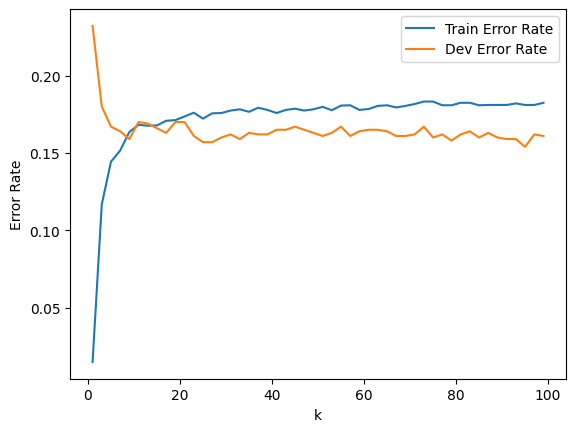

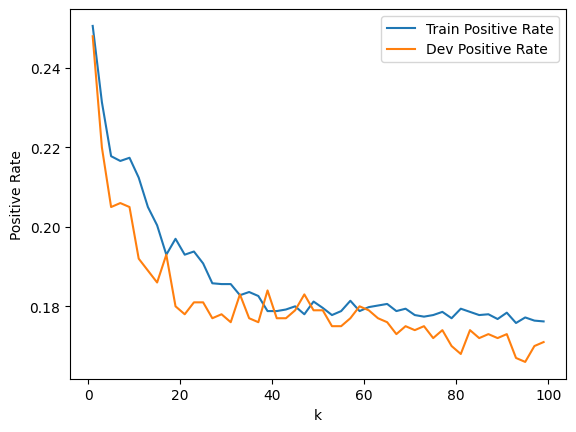

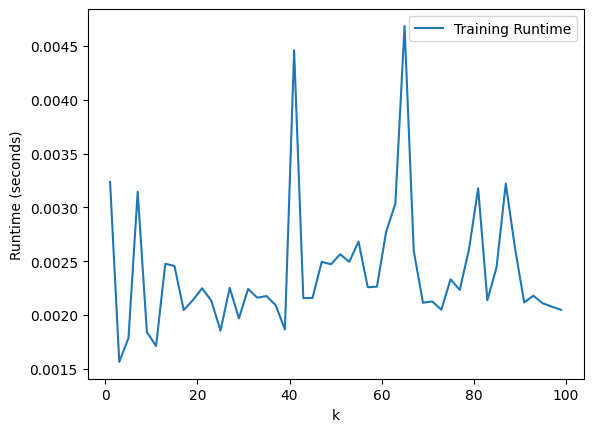

In [30]:
sns.lineplot(x=ks, y=error_rates_train, label="Train Error Rate")
sns.lineplot(x=ks, y=error_rates_dev, label="Dev Error Rate")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

sns.lineplot(x=ks, y=positive_rates_train, label="Train Positive Rate")
sns.lineplot(x=ks, y=positive_rates_dev, label="Dev Positive Rate")
plt.xlabel("k")
plt.ylabel("Positive Rate")
plt.legend()
plt.show()

sns.lineplot(x=ks, y=runtimes, label="Training Runtime")
plt.xlabel("k")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.show()

#### Q: what’s your best error rate on dev? 
#### Which k achieves this best error rate? (Hint: 1-NN dev error should
#### be ∼23% and the best dev error should be ∼16%). (1 pt)

Yes, when k=1 in a k-NN (k-Nearest Neighbors) algorithm, the training error is typically 0% because for each instance in the training set, the closest instance is itself.

#### Q: What trends (train and dev error rates and positive ratios, and running speed) do you observe with
#### increasing k?

Train error: As k increases, the training error rate starts to rise. This is because the decision boundary becomes smoother with larger k, and it becomes less sensitive to individual data points.

Dev error: The model's variance decreases and its bias increases. This led to a decrease in the dev error rate initially (since the overfitting reduces), but after a certain point, as k becomes too large, the model may become too biased and the dev error rate might start increasing again.

The predicted positive ratio for both training and dev sets became more stable as k increased.

As k increases, prediction time generally increases because more distances need to be computed and sorted to determine the top k neighbors.

#### Q: What does k = ∞ actually do? Is it extreme overfitting or underfitting? What about k = 1?

k = 1 leads to extreme overfitting because it relies too much on the noise of the training data.

k = ∞ leads to extreme underfitting because it oversimplifies the problem and ignores the useful patterns in the data.

# Part 3

In [31]:
toy_data = pd.read_csv("toy.txt", sep=", ", names=["age", "sector"]) 

/var/folders/0w/8f1jvhb168s59xf27pmhg6yw0000gp/T/ipykernel_4082/4066432312.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  toy_data = pd.read_csv("toy.txt", sep=", ", names=["age", "sector"])


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [33]:
num_processor = 'passthrough' # i.e., no transformation
cat_processor = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [34]:
train_y = train_data[['target']]
train_X = train_data[['age', 'hours', 'sector', 'edu', 'marriage', 'occupation', 'race', 'sex', 'country']]

dev_y = dev_data[['target']]
dev_X = dev_data[['age', 'hours', 'sector', 'edu', 'marriage', 'occupation', 'race', 'sex', 'country']]

In [35]:
# Instantiate and fit the encoder to your training labels
le = LabelEncoder()
train_y = le.fit_transform(train_y)
dev_y = le.transform(dev_y)

/Users/chikezic/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chikezic/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [36]:
preprocessor = ColumnTransformer([
    ('num', num_processor, ['age', 'hours']),
    ('cat', cat_processor, ['sector', 'edu', 'marriage', 'occupation', 'race', 'sex', 'country'])
])

In [37]:
preprocessor.fit(train_X)
processed_train_X = preprocessor.transform(train_X)

/Users/chikezic/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
len(preprocessor.get_feature_names_out())

92

In [39]:
processed_dev_X = preprocessor.transform(dev_X)

In [40]:
len(preprocessor.get_feature_names_out())

92

In [41]:
ks, error_rates_train, error_rates_dev, positive_rates_train, positive_rates_dev, runtimes, best_k = evaluate_knn(processed_train_X, train_y, processed_dev_X, dev_y)

Error when k is 1: 0.02
Time for k=99: 1.208024024963379seconds
Best error rate on dev set: 0.21(20.70%)
Value of k that achieves the best error rate: 33


In [42]:
# results = evaluate_knn(processed_train_X, train_y, processed_dev_X, dev_y)

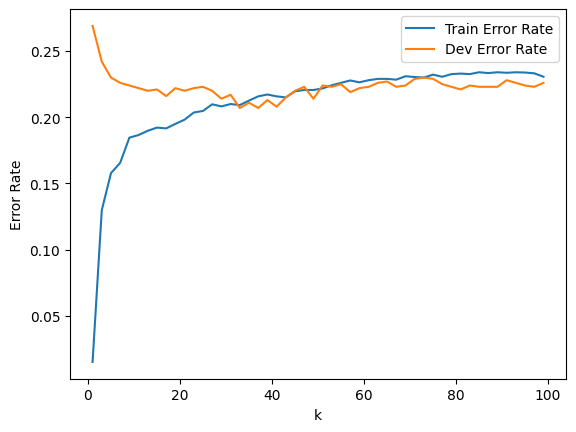

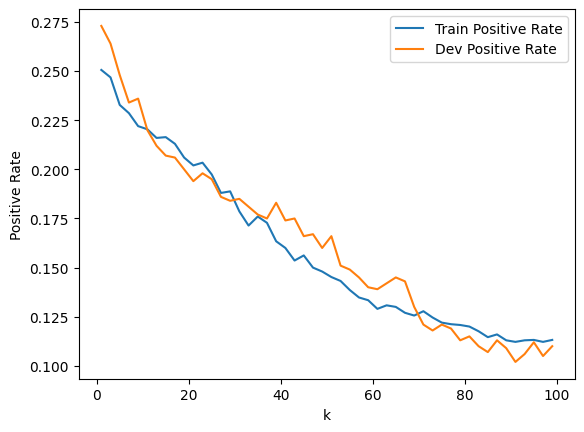

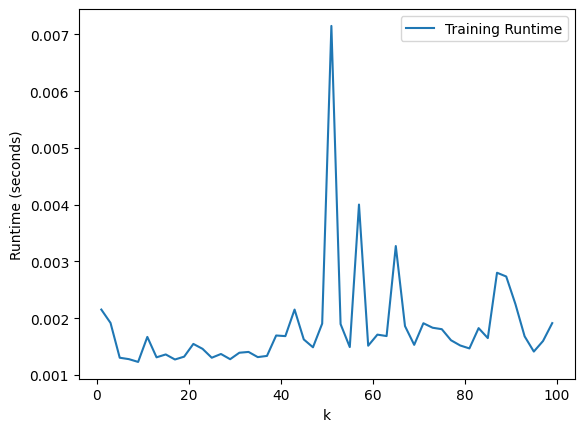

In [43]:
sns.lineplot(x=ks, y=error_rates_train, label="Train Error Rate")
sns.lineplot(x=ks, y=error_rates_dev, label="Dev Error Rate")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

sns.lineplot(x=ks, y=positive_rates_train, label="Train Positive Rate")
sns.lineplot(x=ks, y=positive_rates_dev, label="Dev Positive Rate")
plt.xlabel("k")
plt.ylabel("Positive Rate")
plt.legend()
plt.show()

sns.lineplot(x=ks, y=runtimes, label="Training Runtime")
plt.xlabel("k")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.show()

#### Do you notice any performance improvements compared to the initial results? If so, why? If not, why do you think that is?

Numerical fields might have dominated the distance calculations, especially after treating categorical and numerical fields differently.

In [44]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [45]:
num_processor = MinMaxScaler(feature_range=(0, 2))
cat_processor = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [46]:
train_y = train_data[['target']]
train_X = train_data[['age', 'hours', 'sector', 'edu', 'marriage', 'occupation', 'race', 'sex', 'country']]

dev_y = dev_data[['target']]
dev_X = dev_data[['age', 'hours', 'sector', 'edu', 'marriage', 'occupation', 'race', 'sex', 'country']]

In [47]:
blind_X = blind_data[['age', 'hours', 'sector', 'edu', 'marriage', 'occupation', 'race', 'sex', 'country']]

In [48]:
le = LabelEncoder()
train_y = le.fit_transform(train_y)
dev_y = le.transform(dev_y)

/Users/chikezic/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chikezic/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [49]:
preprocessor = ColumnTransformer([
    ('num', num_processor, ['age', 'hours']),
    ('cat', cat_processor, ['sector', 'edu', 'marriage', 'occupation', 'race', 'sex', 'country'])
])

In [50]:
preprocessor.fit(train_X)
processed_train_X = preprocessor.transform(train_X)

/Users/chikezic/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [51]:
len(preprocessor.get_feature_names_out())

92

In [52]:
processed_dev_X = preprocessor.transform(dev_X)

In [53]:
ks, error_rates_train, error_rates_dev, positive_rates_train, positive_rates_dev, runtimes, best_k = evaluate_knn(processed_train_X, train_y, processed_dev_X, dev_y)

Error when k is 1: 0.02
Time for k=99: 0.9745378494262695seconds
Best error rate on dev set: 0.14(14.40%)
Value of k that achieves the best error rate: 37


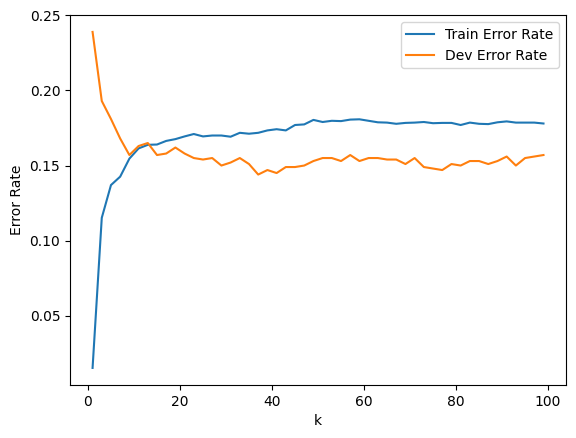

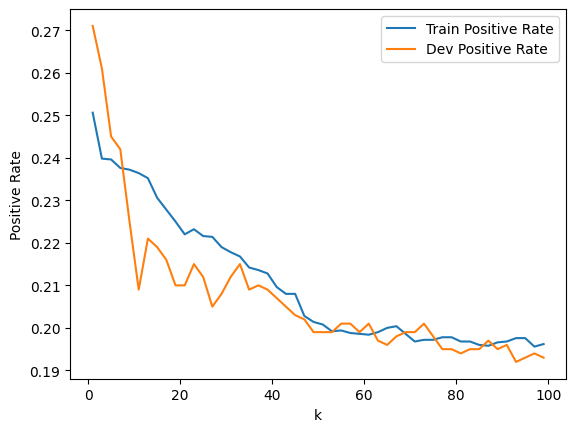

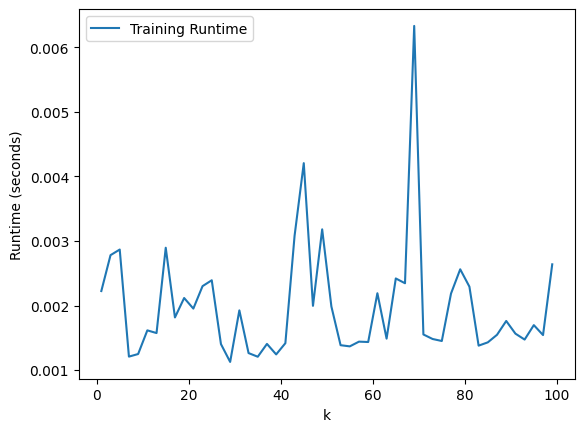

In [54]:
sns.lineplot(x=ks, y=error_rates_train, label="Train Error Rate")
sns.lineplot(x=ks, y=error_rates_dev, label="Dev Error Rate")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

sns.lineplot(x=ks, y=positive_rates_train, label="Train Positive Rate")
sns.lineplot(x=ks, y=positive_rates_dev, label="Dev Positive Rate")
plt.xlabel("k")
plt.ylabel("Positive Rate")
plt.legend()
plt.show()

sns.lineplot(x=ks, y=runtimes, label="Training Runtime")
plt.xlabel("k")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.show()

# Part 5

In [55]:
processed_blind_X = preprocessor.transform(blind_X)

In [56]:
knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the KNN classifier on just the training set
knn.fit(processed_train_X, train_y)

# 2. Predict on the Blind Test Set
predictions_blind = knn.predict(processed_blind_X)

In [57]:
predictions = knn.predict(processed_blind_X)

predicted_labels = le.inverse_transform(predictions)
print(predicted_labels)

['>50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '>50K' '>50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '>50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K'
 '<=50K' '>50K' '<=50K' '>50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '>50K' '>50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K'
 '>50K' '<=50K' '>50K' '>50K' '<=50K' '<=50K' '<=50K' '>50K' '>50K'
 '<=50K' '>50K' '<=50K' '>50K' '<=50K' '>50K' '<=50K' '>50K' '<=50K'
 '<=50K' '<=50K' '>50K' '>50K' '<=50K' '>50K' '<=50K' '>50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K'
 '<=50K' '>50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '

In [58]:
income_test_predicted = blind_data
income_test_predicted['target'] = predicted_labels

In [59]:
# Specify a filename
filename = "income.test.predicted"

# Overwrite the file with the dataframe
income_test_predicted.to_csv(filename, mode='w', header=False, index=False, sep=',')


In [60]:
# Open the file in read mode and read its content
with open('income.test.predicted', 'r') as file:
    content = file.read()

# Replace all occurrences of 'A' with 'B'
content_modified = content.replace(',', ', ')

# Write the modified content back to the file
with open('income.test.predicted', 'w') as file:
    file.write(content_modified)


In [61]:
 !cat income.test.predicted | python3 validate.py

Your file has passed the formatting test! :)
Your positive rate is 21.4%.
Your positive rate seems reasonable.
This does not guarantee that your prediction accuracy will be good though.


In [62]:
 !cat income.test.blind | python3 random_output.py | python3 validate.py

Your file has passed the formatting test! :)
Your positive rate is 49.9%.
ERROR: Your positive rate seems too high (should be similar to train and dev).
PLEASE DOUBLE CHECK YOUR BINARIZATION AND kNN CODE.


# Part 4

In [63]:
first_person = processed_dev_X[0].reshape(1, -1)

distances, indices = knn.kneighbors(first_person, n_neighbors=3)

closest_neighbors_data = processed_train_X[indices[0]]

In [64]:
# first_person

In [65]:
print("Indices of the three closest individuals:", indices)
print("Distances to the three closest individuals:", distances)

Indices of the three closest individuals: [[4872 4787 2591]]
Distances to the three closest individuals: [[0.33441929 1.41527469 1.41674697]]


In [66]:
euclidean_distances = np.linalg.norm(processed_train_X[indices[0]] - first_person, axis=1)
print("Euclidean Distances:")
for i, distance in enumerate(euclidean_distances):
    print(f"Neighbor {i+1}: {distance:.2f}")

Euclidean Distances:
Neighbor 1: 0.33
Neighbor 2: 1.42
Neighbor 3: 1.42


In [67]:
manhattan_distances = np.sum(np.abs(processed_train_X[indices[0]] - first_person), axis=1)
print("\nManhattan Distances:")
for i, distance in enumerate(manhattan_distances):
    print(f"Neighbor {i+1}: {distance:.2f}")


Manhattan Distances:
Neighbor 1: 0.39
Neighbor 2: 2.05
Neighbor 3: 2.10


In [68]:
type(processed_train_X)

numpy.ndarray

In [69]:
processed_train_X.shape

(5000, 92)

In [70]:
processed_dev_X[0].shape

(92,)

In [71]:
first_person_1 = processed_dev_X[0].reshape(1, -1)
distance_list = []
for train in processed_train_X:
    euclidean_distance = np.linalg.norm(train - first_person_1,axis = 1)
#     print(euclidean_distance)
    distance_list.append(euclidean_distance)

In [72]:
combined_array = np.concatenate(distance_list)

print(combined_array)

[2.10837715 2.83675734 2.83874116 ... 2.61888242 2.45299161 2.90564341]


In [73]:
index_distances = []
for index, distance in enumerate(combined_array): 
    index_distance = index,distance
    index_distances.append(index_distance)

In [74]:
index_distances

[(0, 2.1083771507240128),
 (1, 2.8367573410237354),
 (2, 2.8387411576101567),
 (3, 3.1980210413280283),
 (4, 2.8387411576101567),
 (5, 3.789759949978551),
 (6, 2.4569859347695644),
 (7, 3.1870883048353815),
 (8, 2.0042873588962395),
 (9, 2.925447506510059),
 (10, 2.8599474731301515),
 (11, 2.541063976192029),
 (12, 3.183907253095547),
 (13, 3.1766057033149226),
 (14, 2.8882335883709715),
 (15, 2.8525892442331107),
 (16, 2.45910394490596),
 (17, 3.1627523519052323),
 (18, 2.466875212743556),
 (19, 2.452226491920896),
 (20, 3.187088304835381),
 (21, 2.0251508888301335),
 (22, 2.9185312403104353),
 (23, 2.9218531853896024),
 (24, 2.454062363943692),
 (25, 2.895462543462942),
 (26, 3.2356680395557786),
 (27, 2.4516142290736904),
 (28, 1.4762450843486454),
 (29, 2.9617421286435497),
 (30, 3.164990966342758),
 (31, 2.9056434078558206),
 (32, 2.9451671469743004),
 (33, 2.452991605577007),
 (34, 2.479674476041832),
 (35, 2.0145598427224374),
 (36, 2.8882335883709715),
 (37, 2.029408817747532),

In [75]:
# type(index_distances)

In [76]:
index = index_distances

In [77]:
for i in index_distances: 
    indexes , distance = index_distance
#     print(indexes)

In [78]:
result_scratch = np.argpartition(combined_array, 3) 
print(result_scratch[:3])
print(combined_array[result_scratch[:3]])

[4787 4872 2591]
[1.41527469 0.33441929 1.41674697]


In [79]:
first_person_1_man = processed_dev_X[0].reshape(1, -1)
distance_list_man = []
for train in processed_train_X:
    manhattan_distance = np.sum(np.abs(train - first_person_1_man),axis = 1)
#     print(euclidean_distance)
    distance_list_man.append(manhattan_distance)

In [80]:
combined_manhattan = np.concatenate(distance_list_man)

print(combined_manhattan)

[4.79004753 8.29382164 8.3212189  ... 7.25468269 6.1842326  8.75957506]


In [81]:
result_manhattan = np.argpartition(combined_manhattan, 3) 
# result_manhattan
print(combined_manhattan[result_manhattan[:3]])

[2.10204082 0.38999161 2.05479452]


In [82]:
result_manhattan = np.argsort(combined_manhattan) 
print(result_manhattan[:3])
print(combined_manhattan[result_manhattan[:3]])

[4872 4787 4142]
[0.38999161 2.05479452 2.10204082]


In [83]:
combined_manhattan[result_manhattan[-3:]]

array([15.11294381, 15.11350294, 15.28962818])

In [84]:
def get_indices_of_k_smallest(arr, k):
    idx = np.argsort(arr.ravel(), k)
    return tuple(np.array(np.unravel_index(idx, arr.shape))[:, range(min(k, 0), max(k, 0))])